In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


In [8]:
import sys
print(sys.executable)

/Users/sofiascaiano/Documents/maestria/Data Mining EyF/churn/venv/bin/python


In [9]:
df = pd.read_csv("/Users/sofiascaiano/Documents/maestria/Data Mining EyF/datasets/competencia_01_target.csv")

/var/folders/8q/7djkg4_55rsgfbzr3shf6lsc0000gn/T/ipykernel_49270/4054144402.py:1: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/sofiascaiano/Documents/maestria/Data Mining EyF/datasets/competencia_01_target.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978439 entries, 0 to 978438
Columns: 155 entries, numero_de_cliente to target
dtypes: float64(89), int64(64), object(2)
memory usage: 1.1+ GB


In [28]:
df['foto_mes'].head()

0    2021-04-30
1    2021-04-30
2    2021-04-30
3    2021-04-30
4    2021-04-30
Name: foto_mes, dtype: object

In [14]:
X = df[(df['target'] == 'BAJA+2') & (df['foto_mes'] == '2021-04-30')].dropna(subset=['target']).drop(columns=['numero_de_cliente', 'foto_mes', 'target'])
# y_dummy = np.zeros(len(X)) # Etiqueta ficticia
# X = np.random.rand(1100, 150)

In [22]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

# ==========================
# 2. Generar datos sintéticos
# ==========================
X_synthetic = np.copy(X)
for i in range(X.shape[1]):
    np.random.shuffle(X_synthetic[:, i])

X_combined = np.vstack((X, X_synthetic))
y_combined = np.array([1]*len(X) + [0]*len(X_synthetic))

# ==========================
# 3. Entrenar Random Forest
# ==========================
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_combined, y_combined)

# ==========================
# 4. Calcular matriz de proximidad
# ==========================
leaves = rf.apply(X)
n_samples, n_trees = leaves.shape

proximity = np.zeros((n_samples, n_samples))
for t in range(n_trees):
    for i in range(n_samples):
        for j in range(i, n_samples):
            if leaves[i, t] == leaves[j, t]:
                proximity[i, j] += 1
                if i != j:
                    proximity[j, i] += 1
proximity /= n_trees

# ==========================
# 5. Distancia = 1 - proximidad
# ==========================
distance_matrix = 1 - proximity

# Convertir a forma condensada
distance_condensed = squareform(distance_matrix)


/Users/sofiascaiano/Documents/maestria/Data Mining EyF/churn/venv/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Clusters encontrados: [1 2 3 4 5]


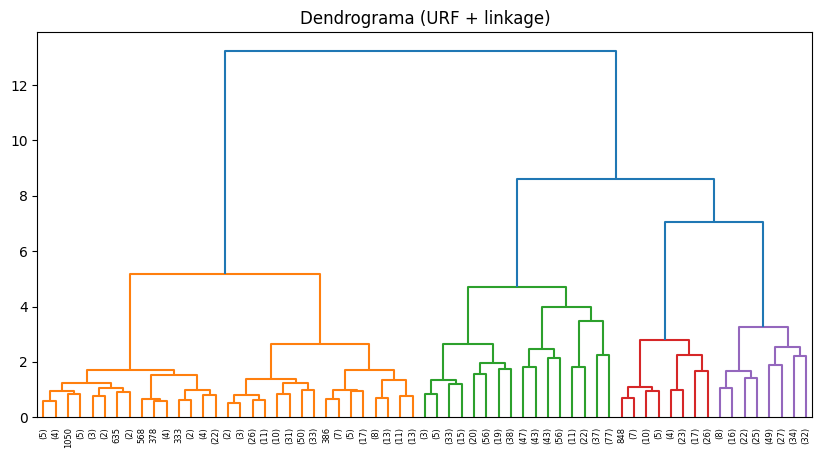

In [25]:
# ==========================
# 6. Clustering jerárquico con linkage()
# ==========================
Z = linkage(distance_condensed, method="ward")  # 'average', 'complete', 'single'

# Cortar el dendrograma 
labels = fcluster(Z, t=5, criterion="distance")

print("Clusters encontrados:", np.unique(labels))

# ==========================
# 7. Dendrograma
# ==========================
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="level", p=5, color_threshold=0.5*max(Z[:,2]))
plt.title("Dendrograma (URF + linkage)")
plt.show()
